In [24]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import sys

## Error Definitions

Following is an example for the concept of absolute error, relative error and decimal precision:

We shall test the approximation to common mathematical constant, $e$. Compute the absolute and relative errors along with the decimal precision if we take the approximate value of $e = 2.718$.

In [25]:
# We can use the formulas you derieved above to calculate the actual numbers

# CODE HERE - Make sure to print out the results
def e_Approx(x):
    return (2.718**x)

print("Approximation of e:")
print(e_Approx(1))

#Without using taylor expansion
print("\nHigher precision of e (from numpy):")
print(np.e)

#Absolute Error
print("\nAbsolute error of e and 2.718")
absError = abs(np.e - e_Approx(1))
print(absError)

#Relative Error
print("\nRelative error of e and 2.718")
relError = absError/abs(np.e)
print(relError)

Approximation of e:
2.718

Higher precision of e:
2.71828182846

Absolute error of e and 2.718
0.000281828459045

Relative error of e and 2.718
0.00010367889602


## Model Error

Model error arises in various forms, here we are gonna take some population data and fit two different models and 
analyze which model is better for the given data.  Take a look at the code below and comment on the results.

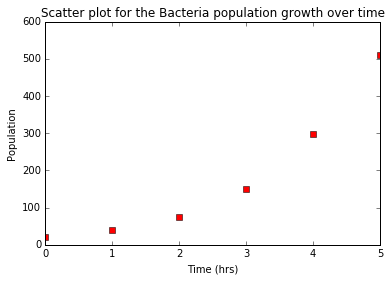

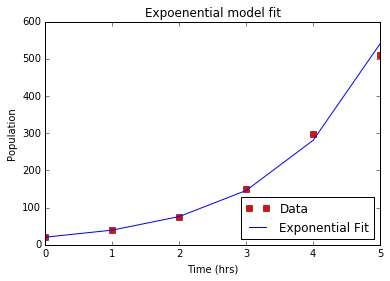

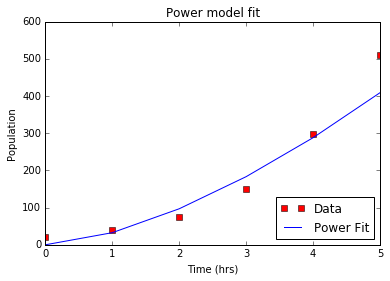

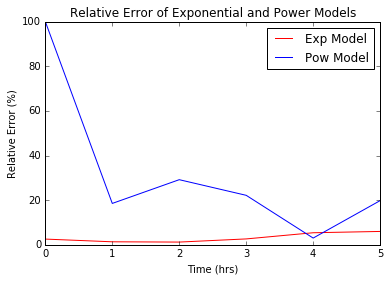

In [33]:
# Model Error
time = [0, 1, 2, 3, 4, 5] # hours
growth = [20, 40, 75, 150, 297, 510] # Bacteria Population

time = np.array(time)
growth = np.array(growth)

# First we can just plot the data to visualize it
plt.plot(time,growth,'rs')
plt.title("Scatter plot for the Bacteria population growth over time")
plt.xlabel('Time (hrs)')
plt.ylabel('Population')
plt.show()

# Now we can use the Exponential Model, y = ab^x, to fit the data
a = 20.5122; b = 1.9238;
y = a*b**time[:]
ErrRelExp = abs(y-growth)/abs(growth)
plt.plot(time,growth,'rs',time,y,'-b')
plt.title("Expoenential model fit")
plt.xlabel('Time (hrs)')
plt.ylabel('Population')
plt.legend(["Data", "Exponential Fit"], loc=4)
plt.show()

# Now we can use the Power Model, y = ax^b, to fit the data
a = 32.5846; b = 1.572;
y = a*time[:]**b
ErrRelPow = abs(y-growth)/abs(growth)
plt.plot(time,growth,'rs',time,y,'-b')
plt.title("Power model fit")
plt.xlabel('Time (hrs)')
plt.ylabel('Population')
plt.legend(["Data", "Power Fit"], loc=4)
plt.show()

plt.plot(time,(ErrRelExp*100),"-r",time,(ErrRelPow*100),"-b")
plt.title("Relative Error of Exponential and Power Models")
plt.xlabel('Time (hrs)')
plt.ylabel('Relative Error (%)')
plt.legend(["Exp Model","Pow Model"], loc=1)
plt.show()

##Comments from Dan Judkins##
#1234567890123456789012345678901234567890123456789012345678901234567890123456789
# The Power Model does not appear to fit the data as provided as well as the the
# Exponential Model.However, the measurements accuracy is not given and time is
# short.  If the study were to be performed over a longer period, the power
# model may end up being the more appropriate model given resource constraints
# (i.e. space, food, etc.)


## Machine Epsilon

Machine epsilon is a very important concept in floating point error. The value, even though small, can easily compound over a period to cause huge problems.

Below we see a problem demonstrating how easily machine error can creep into a simple piece of code.  Play with different ways to compute this and see what happens

In [75]:
a = 4.0/3.0
b = a - 1.0
c = 3.0 * b
eps = 1.0 - c
print 'Value of a is %s' % a
print 'Value of b is %s' % b
print 'Value of c is %s' % c
print 'Value of epsilon is %s' % eps

val = (1.0 +eps) - 1.0
print '\nvalue of (1.0 + epsilon)-1.0 is %s' % val

#Another calc of machine epsilon
a2 = 10.0 / 9.0
b2 = a2 - 1.0
c2 = 9.0 * b2
eps2 = 1.0 - c2
print '\nValue of a2 is %s' % a2
print 'Value of b2 is %s' % b2
print 'Value of c2 is %s' % c2
print 'Value of epsilon2 is %s' % eps2

#Another calc of machine epsilon
a3 = 5.0/9.0
b3 = 10.0 * a3
c3 = (b3 - 5.0) * 9.0
eps3 = c3 - 5.0
print '\nValue of a3 is %s' % a3
print 'Value of b3 is %s' % b3
print 'Value of c3 is %s' % c3
print 'Value of eps3 is %s' % eps3

Value of a is 1.33333333333
Value of b is 0.333333333333
Value of c is 1.0
Value of epsilon is 2.22044604925e-16

value of (1.0 + epsilon)-1.0 is 2.22044604925e-16

Value of a2 is 1.11111111111
Value of b2 is 0.111111111111
Value of c2 is 1.0
Value of epsilon2 is -4.4408920985e-16

Value of a3 is 0.555555555556
Value of b3 is 5.55555555556
Value of c3 is 5.0
Value of eps3 is -1.7763568394e-15


Ideally `eps` should be 0, but instead we see the machine epsilon and while the value is small it can lead to issues.  Write a loop that multiplies the value `c` above by 10 and see how the error propagates.

In [96]:
loopVal = c
maxVal = 30
for i in range (maxVal):
    loopVal = loopVal * 10

print 'After %s iterations,' % maxVal
print 'loopVal is %s.'% loopVal

epsLoop = (1.0 * 10.0**maxVal) - loopVal
print 'machine epsilon is %s', epsLoop

After 30 iterations,
loopVal is 1e+30.
machine epsilon is %s 2.81474976711e+14


## The largest floating point number
Use the system library to find the largest floating point value.  Now try to compute some things with this number and see what happens.

In [106]:
largestFloat = np.finfo(float).max

ExtraLarge = largestFloat + 10.0

Diff = ExtraLarge - largestFloat

print 'largest floating point number is %s' % largestFloat
print 'add 10.0 to largest float number is %s' % ExtraLarge
print 'Diff between the two is %s' % Diff

largest floating point number is 1.79769313486e+308
add 10.0 to largest float number is 1.79769313486e+308
Diff between the two is 0.0


## The smallest floating point number 
Do the same with the smallest number.

In [107]:
smallestFloat = np.finfo(float).min

ExtraSmall = smallestFloat - 10.0

Diff2 = ExtraSmall - smallestFloat

print 'smallest floating point number is %s' % smallestFloat
print 'remove 10.0 from smallest float number is %s' % ExtraSmall
print 'Diff between the two is %s' % Diff2

smallest floating point number is -1.79769313486e+308
remove 10.0 from smallest float number is -1.79769313486e+308
Diff between the two is 0.0


## Truncation Error
Truncation error is a very common form of error you will keep seeing in the area of Numerical Analysis/Computing.

Here we will look at the classic Calculus example of the approximation $\sin(x) \approx x$ near 0. We can plot them together to visualize the approximation and also plot the error to understand the behavior of the truncation error.

First plot the error of the approximation to $\sin x$ with $x$ on the interval $[-pi, \pi]$.

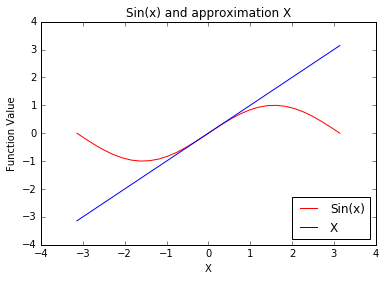

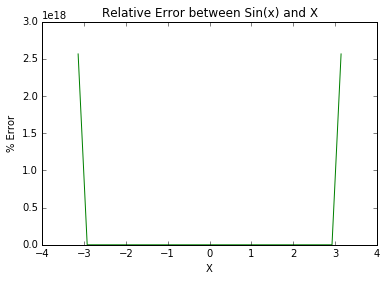

In [118]:
xInterval = np.linspace(-np.pi, np.pi, 30)
ySine = np.sin( xInterval )
yX = xInterval

RelErr = abs(ySine - yX)/abs(ySine)

plt.plot(xInterval,yVal,'-r', xInterval, yX, '-b')
plt.title("Sin(x) and approximation X")
plt.xlabel('X')
plt.ylabel('Function Value')
plt.legend(["Sin(x)","X"], loc=4)
plt.show()

plt.plot(xInterval,(RelErr*100),'-g')
plt.title('Relative Error between Sin(x) and X')
plt.xlabel('X')
plt.ylabel('% Error')
plt.show()

Now try the interval $[-0.5, 0.5]$

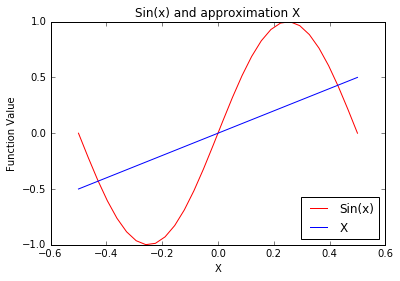

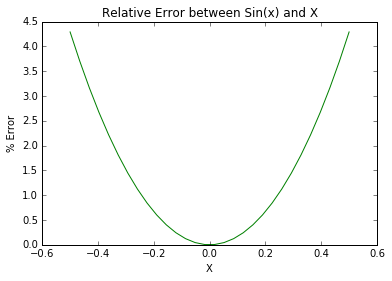

In [119]:
xInterval = np.linspace(-0.5, 0.5, 30)
ySine = np.sin( xInterval )
yX = xInterval

RelErr = abs(ySine - yX)/abs(ySine)

plt.plot(xInterval,yVal,'-r', xInterval, yX, '-b')
plt.title("Sin(x) and approximation X")
plt.xlabel('X')
plt.ylabel('Function Value')
plt.legend(["Sin(x)","X"], loc=4)
plt.show()

plt.plot(xInterval,(RelErr*100),'-g')
plt.title('Relative Error between Sin(x) and X')
plt.xlabel('X')
plt.ylabel('% Error')
plt.show()

Now plot the absolute error

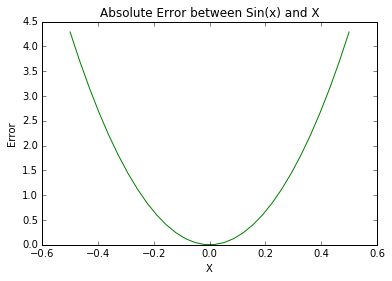

In [122]:
AbsError = abs(ySine - yX)

plt.plot(xInterval,(AbsErr*100),'-g')
plt.title('Absolute Error between Sin(x) and X')
plt.xlabel('X')
plt.ylabel('Error')
plt.show()

Finally the relative error.

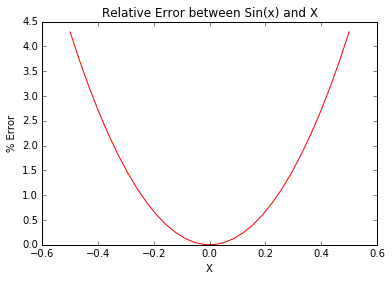

In [123]:
plt.plot(xInterval,(RelErr*100),'-r')
plt.title('Relative Error between Sin(x) and X')
plt.xlabel('X')
plt.ylabel('% Error')
plt.show()
